# Maximising Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement 

#### In the fast-paced taxi booking sector, maximising revenue is crucial for long-term success and driver satisfaction. Our goal is to use data-driven insight to maximise revenue streams for taxi drivers to meet this need. Our research aims to determine whether payment methods have an impact on fair pricing by focusing on the relationship between payment type and fare amount.

## Objective

#### This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We utilise Python's hypothesis testing and descriptive statistics to extract valuable insights that can help taxi drivers increase their revenue. In particular, we aim to determine if there is a significant difference in fares for those who pay with credit cards versus those who pay with cash.

## Research Question

#### Is there a relationship between total fare amount and payment type, and can we move customers towards payment methods that generate higher revenue for drivers, without affecting the CX? 

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
file_name=("/Users/jagritiverma/Documents/Analyst project/statistical_analysis/2020_Yellow_Taxi_Trip_Data.csv")
df = pd.read_csv(file_name)
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [3]:
#number of rows and columns in data
df.shape

(24648499, 18)

In [4]:
#name of each column
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [5]:
# dropping non-required column for the analysis and storing the data in the same file
df = df[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','payment_type','fare_amount']]
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,6.00
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,7.00
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,6.00
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,5.50
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,2.0,3.50
...,...,...,...,...,...,...
24648494,12/31/2020 11:44:35 PM,01/01/2021 12:01:22 AM,NaN,9.22,NaN,32.49
24648495,12/31/2020 11:41:36 PM,12/31/2020 11:50:32 PM,NaN,4.79,NaN,13.22
24648496,12/31/2020 11:01:17 PM,12/31/2020 11:40:37 PM,NaN,28.00,NaN,69.31
24648497,12/31/2020 11:31:29 PM,12/31/2020 11:44:22 PM,NaN,7.08,NaN,35.95


In [6]:
#data type of each column
df.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
payment_type             float64
fare_amount              float64
dtype: object

In [7]:
#convert datatype for pickup and dropoff time from object to datatime for calculating delivery time
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
#data type of each column
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
payment_type                    float64
fare_amount                     float64
dtype: object

In [9]:
#creating the delivery_time column from the dropoff and pickup columns as it may have impact on the final result
df['trip_duration'] = df['tpep_dropoff_datetime']- df['tpep_pickup_datetime']
df['trip_duration'] = df['trip_duration'].dt.total_seconds()/60

In [10]:
# dropping pickup and dropoff columns and storing the data in the same file
df = df[['passenger_count','trip_distance','payment_type','fare_amount','trip_duration']]
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1.0,1.20,1.0,6.00,4.800000
1,1.0,1.20,1.0,7.00,7.416667
2,1.0,0.60,1.0,6.00,6.183333
3,1.0,0.80,1.0,5.50,4.850000
4,1.0,0.00,2.0,3.50,2.300000
...,...,...,...,...,...
24648494,NaN,9.22,NaN,32.49,16.783333
24648495,NaN,4.79,NaN,13.22,8.933333
24648496,NaN,28.00,NaN,69.31,39.333333
24648497,NaN,7.08,NaN,35.95,12.883333


In [11]:
#find the null values in the dataset
df.isnull().sum()

passenger_count    809568
trip_distance           0
payment_type       809568
fare_amount             0
trip_duration           0
dtype: int64

In [12]:
809568/len(df)*100

3.2844515197456854

In [13]:
# drop all null values from the selected columns
df.dropna(inplace=True)

In [14]:
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1.0,1.20,1.0,6.0,4.800000
1,1.0,1.20,1.0,7.0,7.416667
2,1.0,0.60,1.0,6.0,6.183333
3,1.0,0.80,1.0,5.5,4.850000
4,1.0,0.00,2.0,3.5,2.300000
...,...,...,...,...,...
24549234,1.0,11.30,2.0,33.0,26.050000
24549235,1.0,2.18,1.0,9.0,8.216667
24549236,1.0,2.52,1.0,9.5,8.133333
24549237,1.0,0.59,1.0,4.5,2.700000


In [14]:
#convert passenger from float to integer
df['passenger_count']=df['passenger_count'].astype('int64')

In [15]:
df.dtypes

passenger_count      int64
trip_distance      float64
payment_type       float64
fare_amount        float64
trip_duration      float64
dtype: object

In [16]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
2064,1,0.00,2.0,7.0,0.000000
2451,1,0.00,1.0,52.0,0.200000
2456,2,1.70,1.0,9.5,13.066667
2476,1,0.40,1.0,4.0,3.083333
3358,1,1.20,1.0,6.0,5.350000
...,...,...,...,...,...
24549232,3,0.82,2.0,6.0,6.433333
24549233,1,1.83,1.0,7.0,6.183333
24549235,1,2.18,1.0,9.0,8.216667
24549236,1,2.52,1.0,9.5,8.133333


In [17]:
#drop all the duplicate values
df.drop_duplicates(inplace=True)

In [18]:
#check the shape of the dataset
df.shape

(7664923, 5)

In [19]:
#payment type 1 & 2 are card & cash. So, we will focus on 1 and 2 only for research purpose.
df.payment_type.value_counts()

payment_type
1.0    4988228
2.0    2514637
3.0      94911
4.0      67132
5.0         15
Name: count, dtype: int64

In [20]:
 #7, 8 & 9 passenger count are almost negligible in the dataset. so will consider from 1:6. 
df.passenger_count.value_counts()

passenger_count
1    4319571
2    1446682
3     548840
5     505746
6     353020
4     295544
0     195335
7         84
8         52
9         49
Name: count, dtype: int64

In [21]:
#remove the value that did not contribute to the analysis
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]
df = df[(df['payment_type']<3)]

In [22]:
#check the data shape
df.shape

(6967089, 5)

In [23]:
df.describe()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
count,6.967089e+06,6.967089e+06,6.967089e+06,6.967089e+06,6.967089e+06
mean,1.775153e+00,5.322195e+00,1.337199e+00,1.993017e+01,2.874741e+01
std,1.204124e+00,8.142600e+01,4.727535e-01,1.599324e+01,3.048749e+02
min,1.000000e+00,-2.218000e+01,1.000000e+00,-5.000000e+02,-5.312312e+05
25%,1.000000e+00,1.860000e+00,1.000000e+00,1.000000e+01,1.143333e+01
50%,1.000000e+00,3.480000e+00,1.000000e+00,1.550000e+01,1.781667e+01
75%,2.000000e+00,6.770000e+00,2.000000e+00,2.450000e+01,2.601667e+01
max,5.000000e+00,1.673295e+05,2.000000e+00,6.964000e+03,8.525117e+03


In [24]:
# remove the -ve values 
df = df[(df['trip_distance']>0)]
df = df[(df['fare_amount']>0)]
df = df[(df['trip_duration']>0)]

In [25]:
df.describe()

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
count,6.858827e+06,6.858827e+06,6.858827e+06,6.858827e+06,6.858827e+06
mean,1.783506e+00,5.396983e+00,1.338264e+00,1.983029e+01,2.897809e+01
std,1.208434e+00,8.206332e+01,4.731187e-01,1.533247e+01,1.107571e+02
min,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.910000e+00,1.000000e+00,1.000000e+01,1.150000e+01
50%,1.000000e+00,3.530000e+00,1.000000e+00,1.550000e+01,1.781667e+01
75%,2.000000e+00,6.840000e+00,2.000000e+00,2.400000e+01,2.595000e+01
max,5.000000e+00,1.673295e+05,2.000000e+00,6.964000e+03,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x323ee0550>,
 'caps': [<matplotlib.lines.Line2D at 0x323ee07d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x30ef50410>],
 'medians': [<matplotlib.lines.Line2D at 0x323ee0a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x323ee0b90>],
 'means': []}

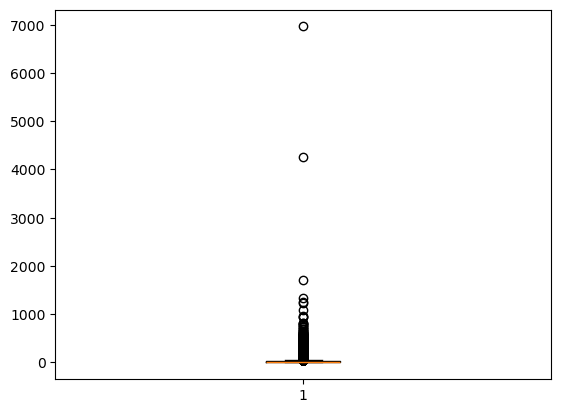

In [26]:
#check the outlier in data
plt.boxplot(df['fare_amount'])

(array([6.858806e+06, 1.800000e+01, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 6.964090e+02, 1.392808e+03, 2.089207e+03,
        2.785606e+03, 3.482005e+03, 4.178404e+03, 4.874803e+03,
        5.571202e+03, 6.267601e+03, 6.964000e+03]),
 <BarContainer object of 10 artists>)

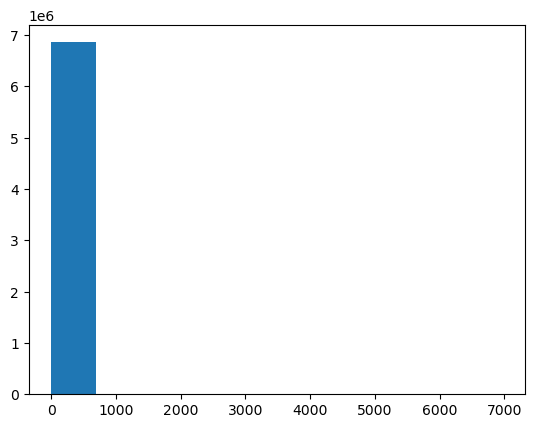

In [27]:
#check the outlier in data
plt.hist(df['fare_amount'])

In [28]:
#used IQR(Inter Quartile Range) method to remove outliers.
for col in ['trip_distance','fare_amount','trip_duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    
    df = df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [29]:
#final dataset for analysis
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1,1.20,1.0,6.0,4.800000
1,1,1.20,1.0,7.0,7.416667
2,1,0.60,1.0,6.0,6.183333
3,1,0.80,1.0,5.5,4.850000
5,1,0.03,2.0,2.5,0.883333
...,...,...,...,...,...
24549227,1,10.63,1.0,29.5,18.400000
24549228,1,2.13,2.0,9.5,13.016667
24549231,1,5.50,2.0,19.0,19.583333
24549234,1,11.30,2.0,33.0,26.050000


In [30]:
#replace the numeric value with the payment type in the data
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [31]:
df

,passenger_count,trip_distance,payment_type,fare_amount,trip_duration
0,1,1.20,card,6.0,4.800000
1,1,1.20,card,7.0,7.416667
2,1,0.60,card,6.0,6.183333
3,1,0.80,card,5.5,4.850000
5,1,0.03,cash,2.5,0.883333
...,...,...,...,...,...
24549227,1,10.63,card,29.5,18.400000
24549228,1,2.13,cash,9.5,13.016667
24549231,1,5.50,cash,19.0,19.583333
24549234,1,11.30,cash,33.0,26.050000


## Data Analysis

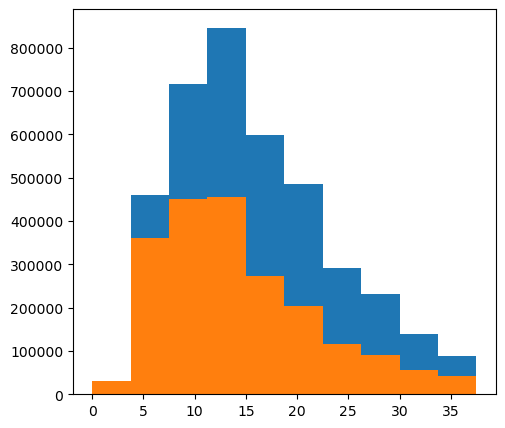

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype= 'barstacked')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype= 'barstacked')
plt.show()

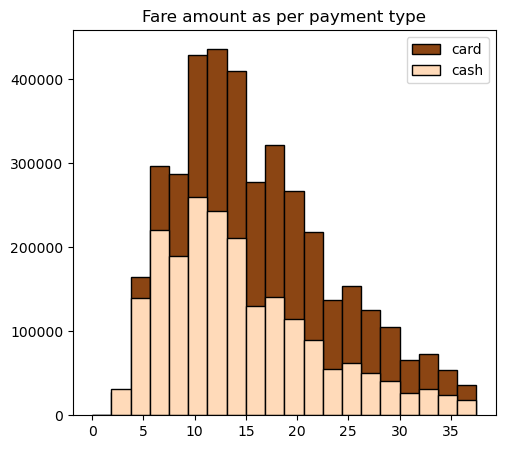

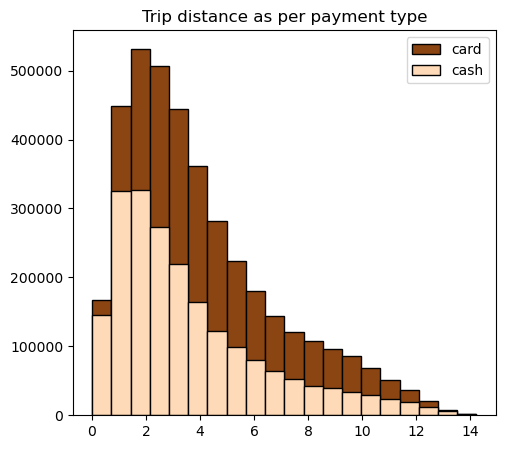

In [33]:
# graphical representation of fare amount & trip distance for each payemnt type
plt.figure(figsize=(12,5))
plt.subplot (1,2,1)
plt.title('Fare amount as per payment type')
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype = 'barstacked', bins=20, edgecolor='k', color='saddlebrown', label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype = 'barstacked', bins=20, edgecolor='k', color='peachpuff', label='cash')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot (1,2,2)
plt.title('Trip distance as per payment type')
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype = 'barstacked', bins=20, edgecolor='k', color='saddlebrown', label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype = 'barstacked', bins=20, edgecolor='k', color='peachpuff', label='cash')
plt.legend()
plt.show()

In [34]:
# mean & standard deviation for trip distance and fare amount for each payment type
df.groupby('payment_type').agg({'trip_distance':['mean','std'],'fare_amount':['mean','std']}).round(2)

trip_distance       fare_amount      
                      mean   std        mean   std
payment_type                                      
card                  4.04  2.79       16.03  7.60
cash                  3.59  2.77       14.46  7.53

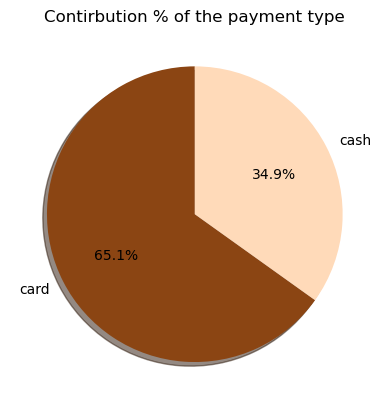

In [35]:
# percentage share of each payment mode
plt.title('Contirbution % of the payment type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index, startangle = 90, shadow=True, autopct='%1.1f%%', colors=['saddlebrown','peachpuff'])
plt.show()

## Null Hypothesis: 
#### There is no difference in the fare amount and the trip distance.

## Alternative Hypothesis: 
#### There is a difference in the fare amount and the trip distance.


In [36]:
# Define X (independent) and y (dependent)
X = df['trip_distance']
y = df['fare_amount']

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 5.221e+07
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        11:27:08   Log-Likelihood:            -1.3782e+07
No. Observations:             5966618   AIC:                         2.756e+07
Df Residuals:                 5966616   BIC:                         2.756e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.4422      0.002   3181.271

## Null Hypothesis: 
### There is no difference in the average fare between customers who pay with a credit card or cash

## Alternative Hypothesis: 
### There is a difference in the average fare between customers who pay with a credit card or cash

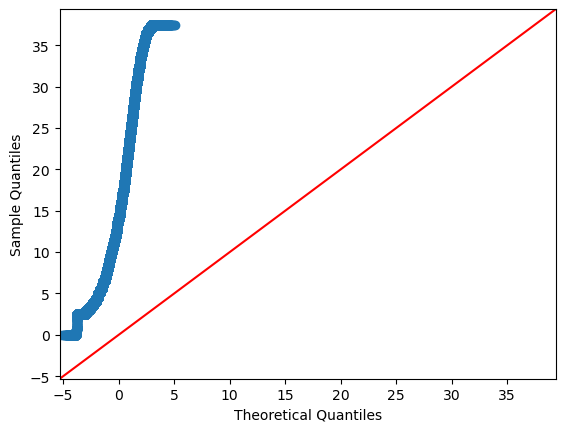

In [37]:
#check how the fare amount is plotted against the red line to see the distribution of the fare amount data
sm.qqplot(df['fare_amount'], line='45')
plt.show()

#### The blue line shows that the data is not normally distributed, so the Z-test cannot be performed. The t-test is performed as the data is not normally distributed even though the dataset is large

In [38]:
card_sample= df[df['payment_type'] == 'card']['fare_amount']
cash_sample= df[df['payment_type'] == 'cash']['fare_amount']

In [39]:
t_stat, p_value = st.ttest_ind (a= card_sample, b=cash_sample, equal_var=False)

print('t-statistic:', t_stat, 'p-value:', p_value)

t-statistic: 240.9803424696501 p-value: 0.0


#### p-value is not statistically significant, so the hypothesis is wrong, and there is a correlation between payment type and fare amount

### Data Analysis

In [40]:
# the usage of payment type based on the number of passengers travelling together
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
card         1                        2218910
             2                         820925
             3                         337374
             4                         180610
             5                         327606
cash         1                        1253159
             2                         430137
             3                         163852
             4                          90808
             5                         143237

In [41]:
# percentage contribution of the payment type usage based on the number of passengers travelling together
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [42]:
passenger_count['perc']=round((passenger_count['count']/passenger_count['count'].sum())*100,2)

In [43]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,2218910,37.19
1,card,2,820925,13.76
2,card,3,337374,5.65
3,card,4,180610,3.03
4,card,5,327606,5.49
5,cash,1,1253159,21.00
6,cash,2,430137,7.21
7,cash,3,163852,2.75
8,cash,4,90808,1.52
9,cash,5,143237,2.40


In [51]:
# formatting to plot on the bar graph type
df = pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df['payment_type']=['card','cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1].values
df.iloc[1,1:] = passenger_count.iloc[5:,-1]  
df

,payment_type,1,2,3,4,5
0,card,37.19,13.76,5.65,3.03,5.49
1,cash,21.0,7.21,2.75,1.52,2.4


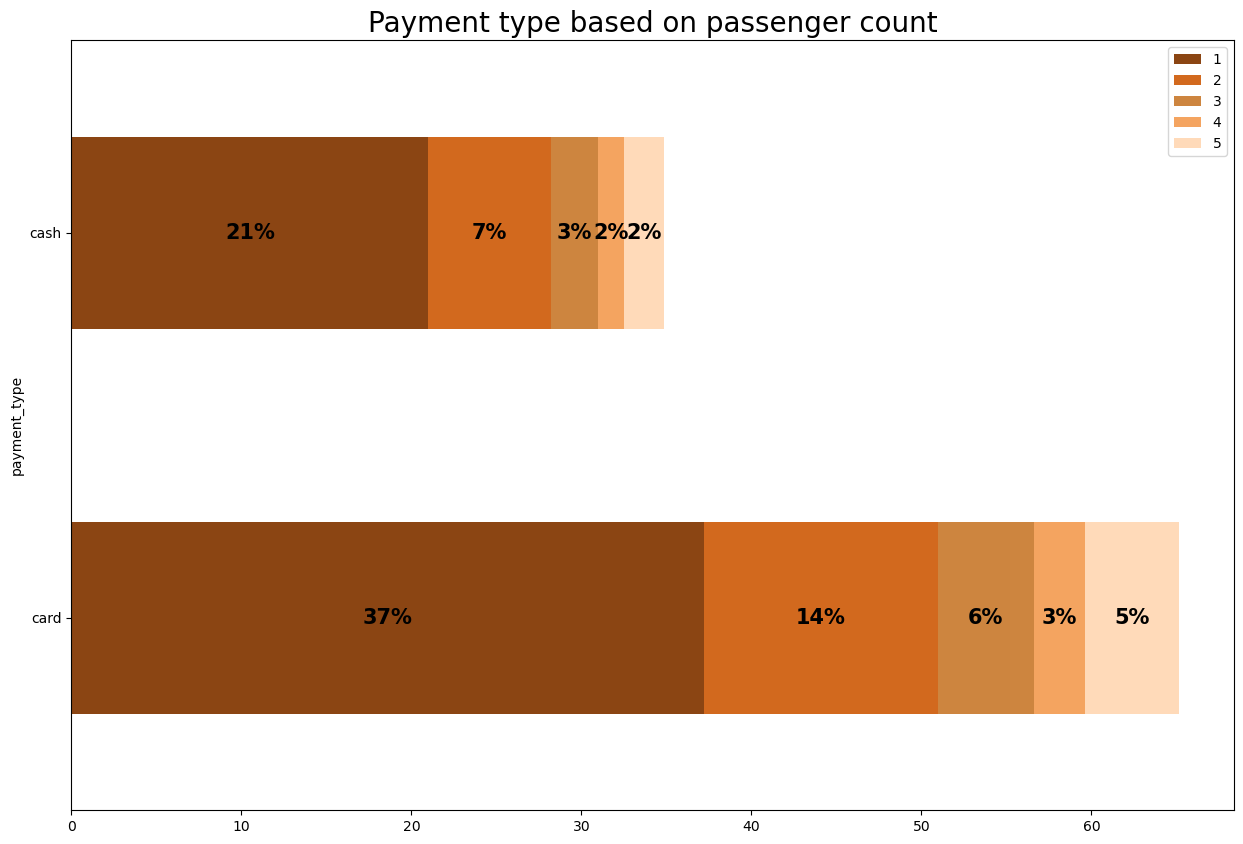

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

df.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['saddlebrown', 'chocolate', 'peru', 'sandybrown', 'peachpuff'],
    ax=ax
)

plt.title('Payment type based on passenger count', fontsize=20)

# Add % labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Only label bars with non-zero width
    if width > 0:
        ax.text(
            x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            ha='center',
            va='center',
            color='black',
            fontweight='bold',
            fontsize=15
        )

plt.show()